In [1]:
from main_functions import *
from load_data import WarwickDataset, default_transforms
import torch
from torch.utils.data import DataLoader
import time

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
train_dataset = WarwickDataset(root_dir='WARWICK/Train', transform=default_transforms,augment=False)
test_dataset = WarwickDataset(root_dir='WARWICK/Test', transform=default_transforms,augment=False)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

##### First Segmentaion Model

In [5]:
first_seg = ConvNet().to(device)
start = time.time()
train_losses, test_losses, train_dice_scores, test_dice_scores = train_model(
    first_seg, train_loader, test_loader, num_epochs = 80, learning_rate= 0.01, device = device, optimizer_type='Adam', use_scheduler=False, hasValidation = False)
end = time.time()

Epoch [1/80], Train Loss: 0.7032, Test Loss: 0.6931, Train Dice Score: 0.3415
Epoch [2/80], Train Loss: 0.6955, Test Loss: 0.6955, Train Dice Score: 0.0380
Epoch [3/80], Train Loss: 0.6930, Test Loss: 0.6931, Train Dice Score: 0.0145
Epoch [4/80], Train Loss: 0.6931, Test Loss: 0.6944, Train Dice Score: 0.4937
Epoch [5/80], Train Loss: 0.6919, Test Loss: 0.6951, Train Dice Score: 0.6674
Epoch [6/80], Train Loss: 0.6852, Test Loss: 0.7118, Train Dice Score: 0.6697
Epoch [7/80], Train Loss: 0.6725, Test Loss: 0.6886, Train Dice Score: 0.6581
Epoch [8/80], Train Loss: 0.6695, Test Loss: 0.7303, Train Dice Score: 0.5316
Epoch [9/80], Train Loss: 0.6609, Test Loss: 0.7094, Train Dice Score: 0.3890
Epoch [10/80], Train Loss: 0.6468, Test Loss: 0.7234, Train Dice Score: 0.4863
Epoch [11/80], Train Loss: 0.6376, Test Loss: 0.6788, Train Dice Score: 0.5564
Epoch [12/80], Train Loss: 0.6213, Test Loss: 0.7814, Train Dice Score: 0.5768
Epoch [13/80], Train Loss: 0.6108, Test Loss: 0.6711, Train D

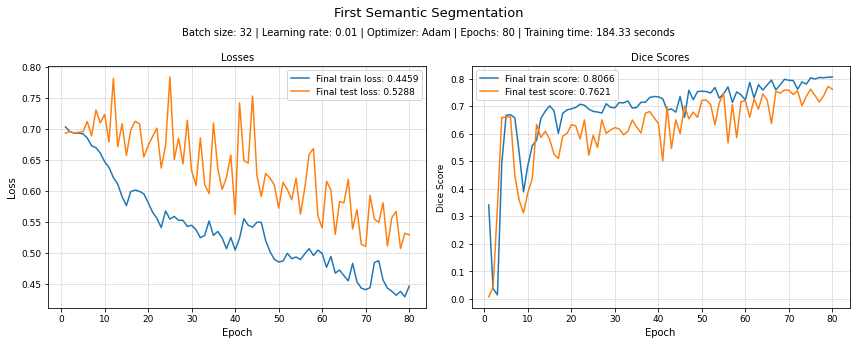

In [6]:
subtitle = f"Batch size: 32 | Learning rate: 0.01 | Optimizer: Adam | Epochs: 80 | Training time: {end - start:.2f} seconds"
training_curve_plot('First Semantic Segmentation',subtitle,train_losses, test_losses, train_dice_scores, test_dice_scores,hasValidation=False)

In [7]:
avg_test_loss, avg_dice_score, test_storage = test_model(first_seg, test_loader, device)

Average Test Loss: 0.5288, Average Dice Score: 0.7457


In [8]:
test_dice_scores = test_storage['dice_scores']
max_index = np.argmax(test_dice_scores) # Index of the best performance
min_index = np.argmin(test_dice_scores)  # Index of the worst performance

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


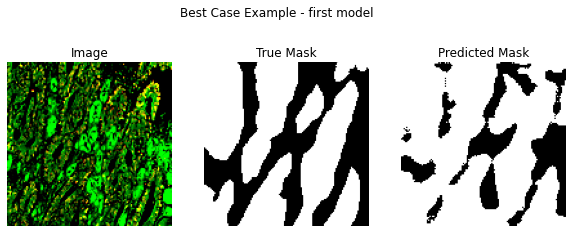

In [9]:
# Show the best performing case
show_output(test_storage['images'], test_storage['masks'], test_storage['outputs'], max_index, "Best Case Example - first model")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


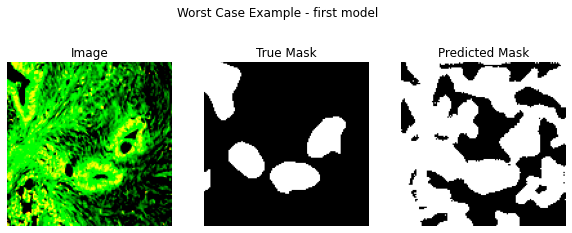

In [10]:
# Show the worst performing case
show_output(test_storage['images'], test_storage['masks'], test_storage['outputs'], min_index, "Worst Case Example - first model")

#### Different Variations

In [11]:
# Split train dataset into train and validation datasets
train_subset, val_subset = split_train_data(train_dataset, size=0.1)

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

##### Second Segmentation (first variation - Batch Normalization)

In [12]:
second_seg = ConvNet_batch().to(device)
start = time.time()
sec_train_losses, sec_val_losses, sec_train_dice_scores, sec_val_dice_scores = train_model(
    second_seg, train_loader, val_loader, num_epochs = 80, learning_rate= 0.01, device = device, optimizer_type='Adam', use_scheduler=False, hasValidation=True)
end = time.time()

Epoch [1/80], Train Loss: 0.8030, Validation Loss: 0.9614, Train Dice Score: 0.4743
Epoch [2/80], Train Loss: 0.6848, Validation Loss: 0.9348, Train Dice Score: 0.5170
Epoch [3/80], Train Loss: 0.6010, Validation Loss: 0.8831, Train Dice Score: 0.6239
Epoch [4/80], Train Loss: 0.5640, Validation Loss: 0.8241, Train Dice Score: 0.6873
Epoch [5/80], Train Loss: 0.5498, Validation Loss: 0.6353, Train Dice Score: 0.7119
Epoch [6/80], Train Loss: 0.5268, Validation Loss: 0.6329, Train Dice Score: 0.7549
Epoch [7/80], Train Loss: 0.5111, Validation Loss: 1.0658, Train Dice Score: 0.7804
Epoch [8/80], Train Loss: 0.4983, Validation Loss: 0.7836, Train Dice Score: 0.8017
Epoch [9/80], Train Loss: 0.4873, Validation Loss: 0.5062, Train Dice Score: 0.8114
Epoch [10/80], Train Loss: 0.4824, Validation Loss: 0.6726, Train Dice Score: 0.8083
Epoch [11/80], Train Loss: 0.4667, Validation Loss: 0.8350, Train Dice Score: 0.8244
Epoch [12/80], Train Loss: 0.4602, Validation Loss: 0.6680, Train Dice Sco

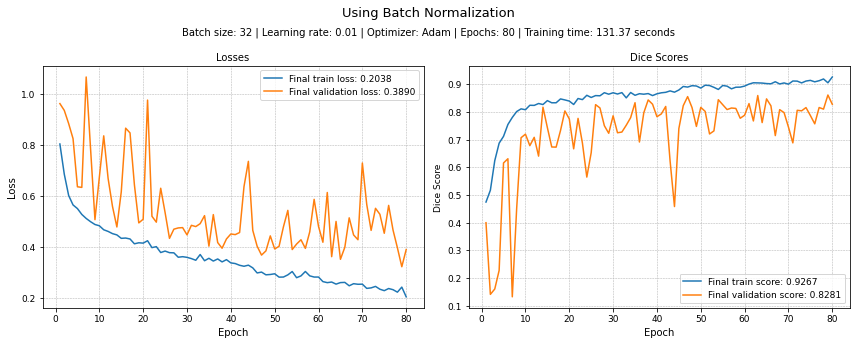

In [13]:
subtitle = f"Batch size: 32 | Learning rate: 0.01 | Optimizer: Adam | Epochs: 80 | Training time: {end - start:.2f} seconds"
training_curve_plot('Using Batch Normalization',subtitle,sec_train_losses, sec_val_losses, sec_train_dice_scores, sec_val_dice_scores, hasValidation=True)

In [14]:
sec_avg_test_loss, sec_avg_dice_score, sec_test_storage = test_model(second_seg, test_loader, device)


Average Test Loss: 0.4420, Average Dice Score: 0.7927


In [15]:
sec_test_dice_scores = sec_test_storage['dice_scores']
max_index = np.argmax(sec_test_dice_scores)
min_index = np.argmin(sec_test_dice_scores)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


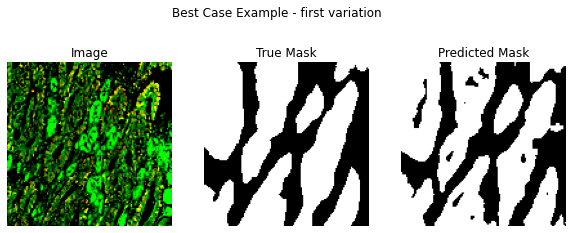

In [16]:
# Show the best performing case
show_output(sec_test_storage['images'], sec_test_storage['masks'], sec_test_storage['outputs'], max_index, "Best Case Example - first variation")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


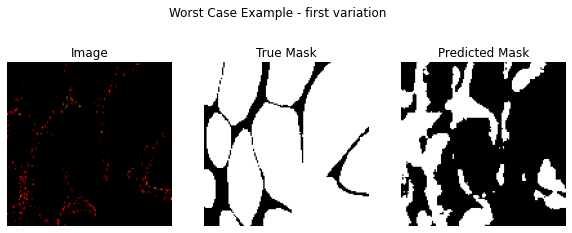

In [17]:
# Show the worst performing case
show_output(sec_test_storage['images'], sec_test_storage['masks'], sec_test_storage['outputs'], min_index, "Worst Case Example - first variation")

##### Third Segmentation (second variation - Using dropout)

In [18]:
third_seg = ConvNet_dropout().to(device)
start = time.time()
third_train_losses, third_val_losses, third_train_dice_scores, third_val_dice_scores = train_model(
    third_seg, train_loader, val_loader, num_epochs = 80, learning_rate= 0.01, device = device, optimizer_type='Adam', use_scheduler=False, hasValidation=True)
end = time.time()

Epoch [1/80], Train Loss: 0.7313, Validation Loss: 0.6978, Train Dice Score: 0.4211
Epoch [2/80], Train Loss: 0.6944, Validation Loss: 0.6974, Train Dice Score: 0.6771
Epoch [3/80], Train Loss: 0.6966, Validation Loss: 0.6961, Train Dice Score: 0.6631
Epoch [4/80], Train Loss: 0.6929, Validation Loss: 0.6866, Train Dice Score: 0.6747
Epoch [5/80], Train Loss: 0.6865, Validation Loss: 0.6726, Train Dice Score: 0.6733
Epoch [6/80], Train Loss: 0.6739, Validation Loss: 0.6445, Train Dice Score: 0.6687
Epoch [7/80], Train Loss: 0.6644, Validation Loss: 0.6344, Train Dice Score: 0.5285
Epoch [8/80], Train Loss: 0.6403, Validation Loss: 0.6386, Train Dice Score: 0.6621
Epoch [9/80], Train Loss: 0.6541, Validation Loss: 0.6579, Train Dice Score: 0.5884
Epoch [10/80], Train Loss: 0.6874, Validation Loss: 0.7035, Train Dice Score: 0.1373
Epoch [11/80], Train Loss: 0.7079, Validation Loss: 0.7016, Train Dice Score: 0.0000
Epoch [12/80], Train Loss: 0.6994, Validation Loss: 0.6977, Train Dice Sco

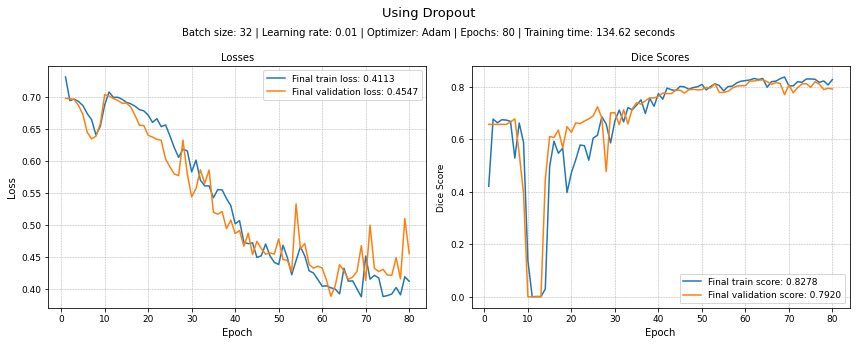

In [19]:
subtitle = f"Batch size: 32 | Learning rate: 0.01 | Optimizer: Adam | Epochs: 80 | Training time: {end - start:.2f} seconds"
training_curve_plot('Using Dropout',subtitle, third_train_losses, third_val_losses, third_train_dice_scores, third_val_dice_scores, hasValidation=True)

In [20]:
third_avg_test_loss, third_avg_dice_score, third_test_storage = test_model(third_seg, test_loader, device)


Average Test Loss: 0.5213, Average Dice Score: 0.7171


In [21]:
third_test_dice_scores = third_test_storage['dice_scores']
max_index = np.argmax(third_test_dice_scores)
min_index = np.argmin(third_test_dice_scores)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


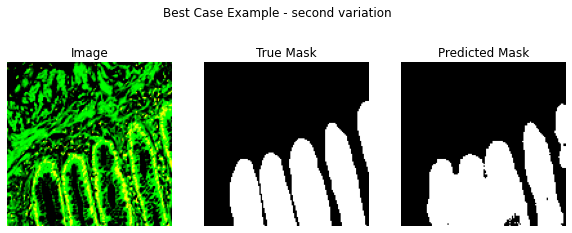

In [22]:
# Show the best performing case
show_output(third_test_storage['images'], third_test_storage['masks'], third_test_storage['outputs'], max_index, "Best Case Example - second variation")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


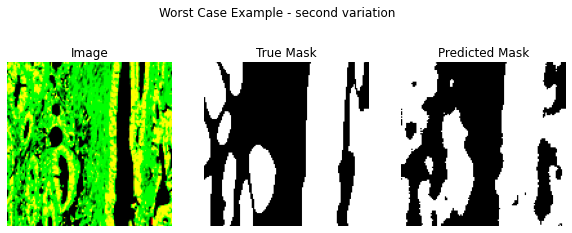

In [23]:
# Show the worst performing case
show_output(third_test_storage['images'], third_test_storage['masks'], third_test_storage['outputs'], min_index, "Worst Case Example - second variation")

##### Fourth Segmentation (third variation - on-the-fly Data Augmentation)

In [24]:
# Create a dataset with augmentations applied
train_dataset_transformed = WarwickDataset(root_dir='WARWICK/Train', transform=default_transforms,augment=True)

train_subset_transformed, val_subset_transformed = split_train_data(train_dataset_transformed, size=0.1)

train_loader_transformed = DataLoader(train_subset_transformed, batch_size=32, shuffle=True)
val_loader_transformed = DataLoader(val_subset_transformed, batch_size=32, shuffle=False)

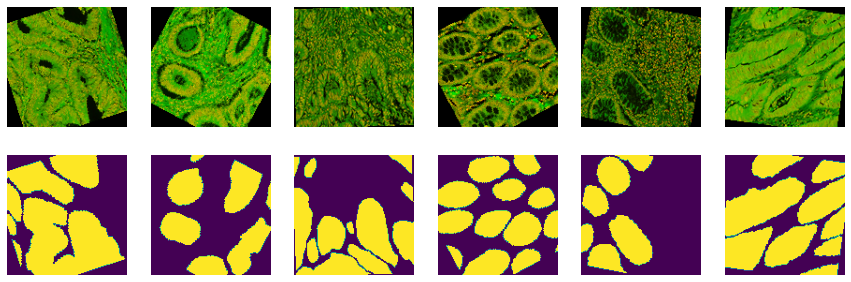

In [25]:
# show samples of the augmented images and their masks
show_augmented_images(train_loader_transformed)

In [26]:
fourth_seg = ConvNet().to(device)
start = time.time()
fourth_train_losses, fourth_val_losses, fourth_train_dice_scores, fourth_val_dice_scores = train_model(
    fourth_seg, train_loader_transformed, val_loader_transformed, num_epochs = 80, learning_rate= 0.001, device = device, optimizer_type='Adam', use_scheduler=False, hasValidation=True)
end = time.time()

Epoch [1/80], Train Loss: 0.6922, Validation Loss: 0.6891, Train Dice Score: 0.2741
Epoch [2/80], Train Loss: 0.6875, Validation Loss: 0.6764, Train Dice Score: 0.0058
Epoch [3/80], Train Loss: 0.6786, Validation Loss: 0.6686, Train Dice Score: 0.0265
Epoch [4/80], Train Loss: 0.6663, Validation Loss: 0.6617, Train Dice Score: 0.3272
Epoch [5/80], Train Loss: 0.6612, Validation Loss: 0.6700, Train Dice Score: 0.5135
Epoch [6/80], Train Loss: 0.6573, Validation Loss: 0.6903, Train Dice Score: 0.6333
Epoch [7/80], Train Loss: 0.6382, Validation Loss: 0.6954, Train Dice Score: 0.6253
Epoch [8/80], Train Loss: 0.6353, Validation Loss: 0.6823, Train Dice Score: 0.6551
Epoch [9/80], Train Loss: 0.6430, Validation Loss: 0.6843, Train Dice Score: 0.6285
Epoch [10/80], Train Loss: 0.6406, Validation Loss: 0.6583, Train Dice Score: 0.6480
Epoch [11/80], Train Loss: 0.6365, Validation Loss: 0.6818, Train Dice Score: 0.6567
Epoch [12/80], Train Loss: 0.6282, Validation Loss: 0.6714, Train Dice Sco

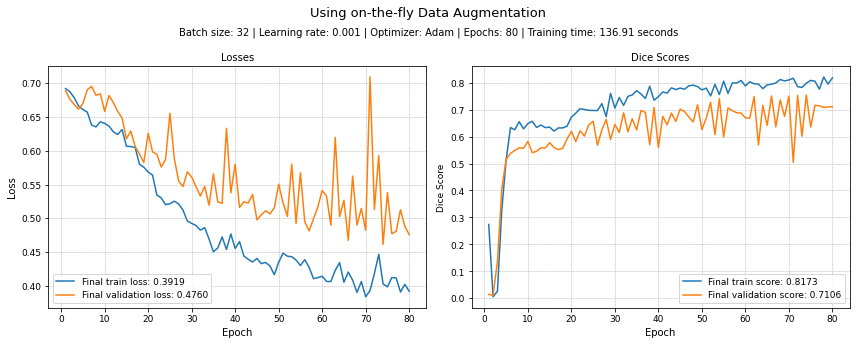

In [27]:
subtitle = f"Batch size: 32 | Learning rate: 0.001 | Optimizer: Adam | Epochs: 80 | Training time: {end - start:.2f} seconds"
training_curve_plot('Using on-the-fly Data Augmentation',subtitle, fourth_train_losses, fourth_val_losses, fourth_train_dice_scores,fourth_val_dice_scores, hasValidation=True)

In [28]:
fourth_avg_test_loss, fourth_avg_dice_score, fourth_test_storage = test_model(fourth_seg, test_loader, device)

Average Test Loss: 0.5039, Average Dice Score: 0.7419


In [29]:
fourth_test_dice_scores = fourth_test_storage['dice_scores']
max_index = np.argmax(fourth_test_dice_scores)
min_index = np.argmin(fourth_test_dice_scores)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


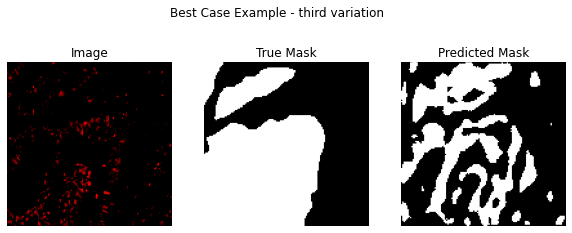

In [30]:
# Show the best performing case
show_output(fourth_test_storage['images'], fourth_test_storage['masks'], fourth_test_storage['outputs'], max_index, "Best Case Example - third variation")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


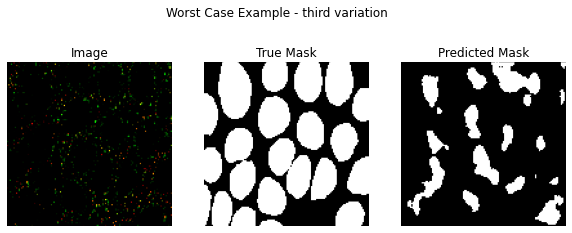

In [31]:
# Show the worst performing case
show_output(fourth_test_storage['images'], fourth_test_storage['masks'], fourth_test_storage['outputs'], min_index, "Worst Case Example - third variation")

#### U-Net

In [32]:
unet_seg = Unet().to(device)
start = time.time()
unet_train_losses, unet_val_losses, unet_train_dice_scores, unet_val_dice_scores = train_model(
    unet_seg, train_loader, val_loader, num_epochs = 80, learning_rate= 0.01, device = device, optimizer_type='Adam', use_scheduler=False, hasValidation=True)
end = time.time()

Epoch [1/80], Train Loss: 0.7179, Validation Loss: 0.6418, Train Dice Score: 0.4803
Epoch [2/80], Train Loss: 0.6493, Validation Loss: 0.6231, Train Dice Score: 0.5930
Epoch [3/80], Train Loss: 0.6392, Validation Loss: 0.5949, Train Dice Score: 0.5804
Epoch [4/80], Train Loss: 0.6356, Validation Loss: 0.5846, Train Dice Score: 0.6306
Epoch [5/80], Train Loss: 0.6290, Validation Loss: 0.5686, Train Dice Score: 0.6327
Epoch [6/80], Train Loss: 0.6165, Validation Loss: 0.5654, Train Dice Score: 0.6146
Epoch [7/80], Train Loss: 0.5785, Validation Loss: 0.6585, Train Dice Score: 0.6146
Epoch [8/80], Train Loss: 0.8259, Validation Loss: 0.6436, Train Dice Score: 0.5166
Epoch [9/80], Train Loss: 0.6608, Validation Loss: 0.6925, Train Dice Score: 0.6655
Epoch [10/80], Train Loss: 0.6678, Validation Loss: 0.6401, Train Dice Score: 0.6061
Epoch [11/80], Train Loss: 0.6538, Validation Loss: 0.6304, Train Dice Score: 0.5558
Epoch [12/80], Train Loss: 0.6490, Validation Loss: 0.6271, Train Dice Sco

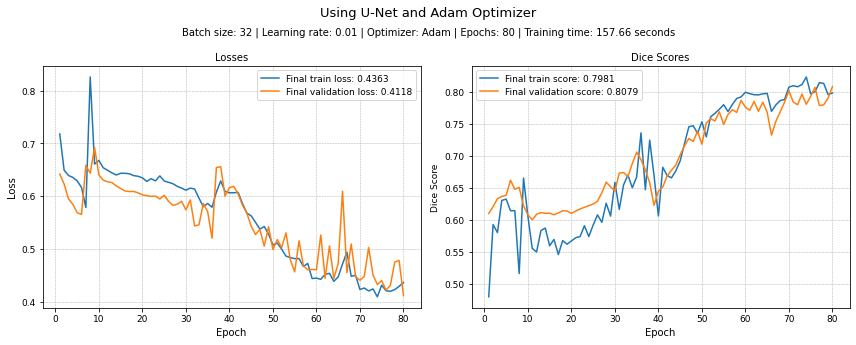

In [33]:
subtitle = f"Batch size: 32 | Learning rate: 0.01 | Optimizer: Adam | Epochs: 80 | Training time: {end - start:.2f} seconds"
training_curve_plot('Using U-Net and Adam Optimizer',subtitle,unet_train_losses, unet_val_losses, unet_train_dice_scores, unet_val_dice_scores, hasValidation=True)

In [34]:
unet_avg_test_loss, unet_avg_dice_score, unet_test_storage = test_model(unet_seg, test_loader, device)


Average Test Loss: 0.4636, Average Dice Score: 0.7795


In [35]:
unet_test_dice_scores = unet_test_storage['dice_scores']
max_index = np.argmax(unet_test_dice_scores)
min_index = np.argmin(unet_test_dice_scores)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


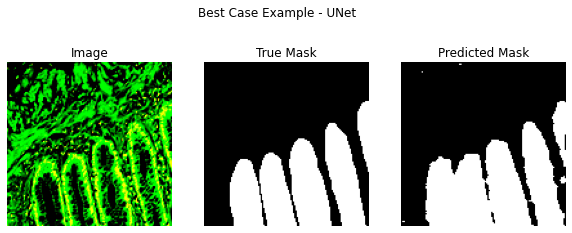

In [36]:
# Show the best performing case
show_output(unet_test_storage['images'], unet_test_storage['masks'], unet_test_storage['outputs'], max_index, "Best Case Example - UNet")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


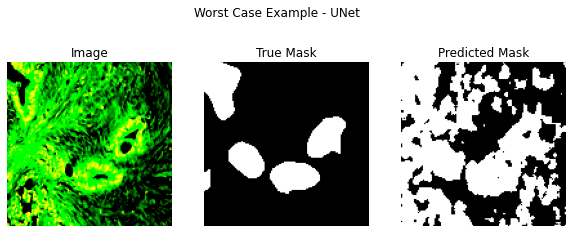

In [37]:
# Show the worst performing case
show_output(unet_test_storage['images'], unet_test_storage['masks'], unet_test_storage['outputs'], min_index, "Worst Case Example - UNet")

#### ResNet

In [38]:
resnet_seg = ResNet().to(device)
start = time.time()
resnet_train_losses, resnet_val_losses, resnet_train_dice_scores, resnet_val_dice_scores = train_model(
    resnet_seg, train_loader, val_loader, num_epochs=80, learning_rate=0.01, device=device, optimizer_type='Adam', use_scheduler=False, hasValidation=True)
end = time.time()

Epoch [1/80], Train Loss: 0.7442, Validation Loss: 0.7930, Train Dice Score: 0.4204
Epoch [2/80], Train Loss: 0.6696, Validation Loss: 0.9111, Train Dice Score: 0.5250
Epoch [3/80], Train Loss: 0.6049, Validation Loss: 1.3387, Train Dice Score: 0.7045
Epoch [4/80], Train Loss: 0.5420, Validation Loss: 0.7725, Train Dice Score: 0.7093
Epoch [5/80], Train Loss: 0.5150, Validation Loss: 0.7667, Train Dice Score: 0.7266
Epoch [6/80], Train Loss: 0.4918, Validation Loss: 0.7806, Train Dice Score: 0.7760
Epoch [7/80], Train Loss: 0.4536, Validation Loss: 0.6862, Train Dice Score: 0.8008
Epoch [8/80], Train Loss: 0.4458, Validation Loss: 0.8732, Train Dice Score: 0.8081
Epoch [9/80], Train Loss: 0.4257, Validation Loss: 0.6793, Train Dice Score: 0.8047
Epoch [10/80], Train Loss: 0.4294, Validation Loss: 0.6653, Train Dice Score: 0.8045
Epoch [11/80], Train Loss: 0.3979, Validation Loss: 0.6657, Train Dice Score: 0.8179
Epoch [12/80], Train Loss: 0.3880, Validation Loss: 0.7606, Train Dice Sco

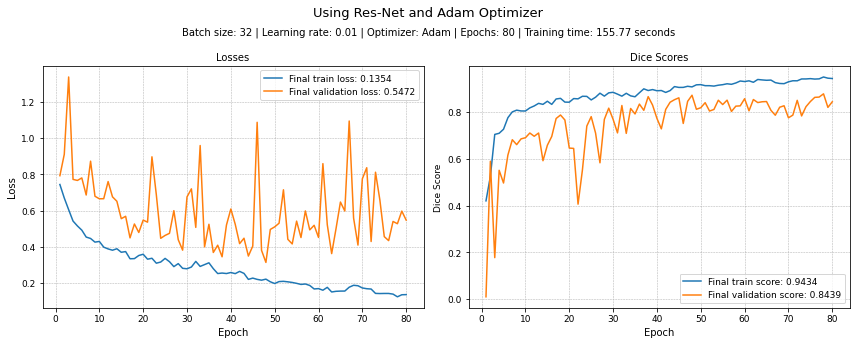

In [39]:
subtitle = f"Batch size: 32 | Learning rate: 0.01 | Optimizer: Adam | Epochs: 80 | Training time: {end - start:.2f} seconds"
training_curve_plot('Using Res-Net and Adam Optimizer',subtitle,resnet_train_losses, resnet_val_losses, resnet_train_dice_scores, resnet_val_dice_scores, hasValidation=True)

In [40]:
resnet_avg_test_loss, resnet_avg_dice_score, resnet_test_storage = test_model(resnet_seg, test_loader, device)

Average Test Loss: 0.4922, Average Dice Score: 0.8361


In [41]:
resnet_test_dice_scores = resnet_test_storage['dice_scores']
max_index = np.argmax(resnet_test_dice_scores)
min_index = np.argmin(resnet_test_dice_scores)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


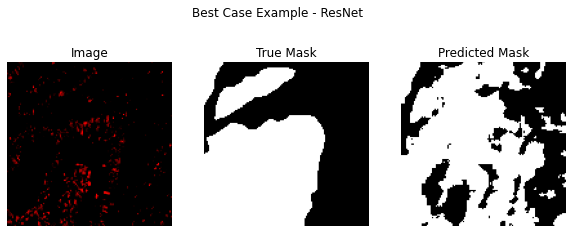

In [42]:
# Show the best performing case
show_output(resnet_test_storage['images'], resnet_test_storage['masks'], resnet_test_storage['outputs'], max_index, "Best Case Example - ResNet")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


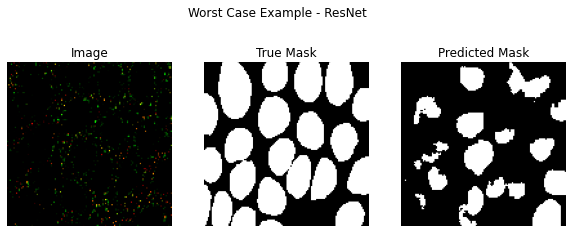

In [43]:
# Show the worst performing case
show_output(resnet_test_storage['images'], resnet_test_storage['masks'], resnet_test_storage['outputs'], min_index, "Worst Case Example - ResNet")